#📌 Extracción

In [412]:
import pandas as pd
import requests
import json
url = 'https://github.com/ingridcristh/challenge2-data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json'
pd.read_json(url)
df = pd.read_json(url)
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [413]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [414]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Unir todas las columnas normalizadas con el dataframe original
df_flat = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                     customer_df, phone_df, internet_df, account_df], axis=1)


df_flat.duplicated().sum()
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [415]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [416]:
df_flat.to_csv('telecomx_data_limpio.csv', index=False)

In [417]:
#from google.colab import files
#files.download('telecomx_data_limpio.csv')

In [418]:
import pandas as pd

df = pd.read_csv('telecomx_data_limpio.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [419]:
df.shape#filasxcolumnas

(7267, 21)

In [420]:
df.info

<bound method DataFrame.info of       customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]>

In [421]:
df.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [422]:
df = df.dropna(subset=['Churn'])
df['Churn'].isna().sum()

np.int64(0)

In [423]:
df.duplicated().sum()

np.int64(0)

In [424]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumna: {col}")
        print(df[col].value_counts(dropna=False))


Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Columna: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Columna: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Columna: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3498
Yes                  

In [425]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [426]:

df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].isnull().sum()
df = df.dropna(subset=['Charges.Total'])
mean_total = df['Charges.Total'].mean()
df['Charges.Total'] = df['Charges.Total'].fillna(mean_total)

/tmp/ipython-input-3415844556.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Charges.Total'] = df['Charges.Total'].fillna(mean_total)


In [427]:
for col in df.select_dtypes(include='object').columns:
    df.loc[:, col] = df[col].str.strip().str.lower()

In [428]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes']
gender: ['female' 'male']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
PhoneService: ['yes' 'no']
MultipleLines: ['no' 'yes' 'no phone service']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['yes' 'no' 'no internet service']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']
Contract: ['one year' 'month-to-month' 'two year']
PaperlessBilling: ['yes' 'no']
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [429]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [430]:
duplicados = df[df.duplicated()]
print(f"Duplicados encontrados: {len(duplicados)}")

Duplicados encontrados: 0


Buscar columnas con muchos valores únicos pero tipo texto (posibles errores)

In [431]:
for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].nunique()
    if unique_vals > 20:
        print(f" Posible error en: {col} (tiene {unique_vals} valores únicos)") #customerID requiere los valores unicos

 Posible error en: customerID (tiene 7032 valores únicos)


In [432]:

df.set_index('customerID', inplace=True)

In [433]:
df['Charges.Total'].unique()[:10]

array([ 593.3 ,  542.4 ,  280.85, 1237.85,  267.4 ,  571.45, 7904.25,
       5377.8 ,  340.35, 5957.9 ])

In [434]:
df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [435]:
df['Charges.Total'].dtype

dtype('float64')

In [436]:
for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].nunique()
    if unique_vals > 20:
        print(f" Posible error en: {col} (tiene {unique_vals} valores únicos)")

In [437]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
customerID,,,,,,,,,,,,,,,,,,,,
0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


**Creación de columna cuentas diarias en el dataframe: Cuentas_Diarias, que representa el gasto promedio diario de un cliente.**

Limpiar nombres de columnas:

In [438]:
df.columns.tolist()

['churn',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'charges.monthly',
 'charges.total']

In [439]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\t', '')

In [440]:
df.loc[:, 'charges.monthly'] = pd.to_numeric(df['charges.monthly'], errors='coerce')


In [441]:
df.loc[:, 'cuentas_diarias'] = df['charges.monthly'] / 30
df[['charges.monthly', 'cuentas_diarias']].head()

,charges.monthly,cuentas_diarias
customerID,,
0002-orfbo,65.6,2.186667
0003-mknfe,59.9,1.996667
0004-tlhlj,73.9,2.463333
0011-igkff,98.0,3.266667
0013-exchz,83.9,2.796667


**Estandarizar datos binarios.**

In [442]:
df.isnull().sum()

,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


**La columna charges.total presenta datos nulos porque representa que son clientes nuevos los que aun no han pagado nada.**
**Se reemplaza entonces esos datos nulos con 0.**

In [443]:
df['charges.total'] = df['charges.total'].fillna(0)
df.isnull().sum()

,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [444]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2:
        print(f"Columna binaria: {col} - Valores: {df[col].unique()}")

Columna binaria: churn - Valores: ['no' 'yes']
Columna binaria: gender - Valores: ['female' 'male']
Columna binaria: partner - Valores: ['yes' 'no']
Columna binaria: dependents - Valores: ['yes' 'no']
Columna binaria: phoneservice - Valores: ['yes' 'no']
Columna binaria: paperlessbilling - Valores: ['yes' 'no']


In [445]:
bin_map = {
    'yes': 1, 'no': 0,
    'male': 1, 'female': 0,
}

In [446]:
for col in df.columns:
    if df[col].nunique() == 2 and df[col].dtype == 'object':
        df.loc[:, col] = df[col].str.strip().str.lower().map(bin_map)

In [447]:
df.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-orfbo,0,0,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
0003-mknfe,0,1,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
0004-tlhlj,1,1,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
0011-igkff,1,1,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
0013-exchz,1,0,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [448]:
df.describe()

,seniorcitizen,tenure,charges.monthly,charges.total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [449]:
df.describe(include='all')#variables numéricas

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
count,7032.0,7032.0,7032.000000,7032.0,7032.0,7032.000000,7032.0,7032,7032,7032,...,7032,7032,7032,7032,7032,7032.0,7032,7032.000000,7032.000000,7032.000000
unique,2.0,2.0,NaN,2.0,2.0,NaN,2.0,3,3,3,...,3,3,3,3,3,2.0,4,NaN,NaN,NaN
top,0.0,1.0,NaN,0.0,0.0,NaN,1.0,no,fiber optic,no,...,no,no,no,no,month-to-month,1.0,electronic check,NaN,NaN,NaN
freq,5163.0,3549.0,NaN,3639.0,4933.0,NaN,6352.0,3385,3096,3497,...,3094,3472,2809,2781,3875,4168.0,2365,NaN,NaN,NaN
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,2.159940
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,1.002866
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.608333
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,1.186250
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,2.345000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,2.995417


In [450]:
df.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-orfbo,0,0,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
0003-mknfe,0,1,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
0004-tlhlj,1,1,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
0011-igkff,1,1,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
0013-exchz,1,0,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [451]:
df.isnull().sum()

,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


**Variables cuantitativas.**

In [452]:
cuantitativas = ['charges.total', 'charges.monthly', 'tenure', 'cuentas_diarias']
df[cuantitativas].describe()


,charges.total,charges.monthly,tenure,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,2283.300441,64.798208,32.421786,2.159940
std,2266.771362,30.085974,24.545260,1.002866
min,18.800000,18.250000,1.000000,0.608333
25%,401.450000,35.587500,9.000000,1.186250
50%,1397.475000,70.350000,29.000000,2.345000
75%,3794.737500,89.862500,55.000000,2.995417
max,8684.800000,118.750000,72.000000,3.958333


In [453]:
for col in cuantitativas:
    std = df[col].std()
    mean = df[col].mean()
    cv = (std / mean) * 100
    print(f" {col} - CV: {cv:.2f}%")


 charges.total - CV: 99.28%
 charges.monthly - CV: 46.43%
 tenure - CV: 75.71%
 cuentas_diarias - CV: 46.43%


In [454]:
numericas = df.select_dtypes(include=['int64', 'float64'])

for col in numericas.columns:
    media = df[col].mean()
    mediana = df[col].median()
    std = df[col].std()
    minimo = df[col].min()
    maximo = df[col].max()
    rango = maximo - minimo
    coef_var = std / media if media != 0 else 0

    print(f" {col.upper()}")
    print(f"  Media: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Desviación estándar: {std:.2f}")
    print(f"  Mínimo: {minimo}")
    print(f"  Máximo: {maximo}")
    print(f"  Rango: {rango}")
    print(f"  Coef. Variación: {coef_var:.2%}")
    print("-" * 40)

 SENIORCITIZEN
  Media: 0.16
  Mediana: 0.00
  Desviación estándar: 0.37
  Mínimo: 0
  Máximo: 1
  Rango: 1
  Coef. Variación: 227.12%
----------------------------------------
 TENURE
  Media: 32.42
  Mediana: 29.00
  Desviación estándar: 24.55
  Mínimo: 1
  Máximo: 72
  Rango: 71
  Coef. Variación: 75.71%
----------------------------------------
 CHARGES.MONTHLY
  Media: 64.80
  Mediana: 70.35
  Desviación estándar: 30.09
  Mínimo: 18.25
  Máximo: 118.75
  Rango: 100.5
  Coef. Variación: 46.43%
----------------------------------------
 CHARGES.TOTAL
  Media: 2283.30
  Mediana: 1397.47
  Desviación estándar: 2266.77
  Mínimo: 18.8
  Máximo: 8684.8
  Rango: 8666.0
  Coef. Variación: 99.28%
----------------------------------------
 CUENTAS_DIARIAS
  Media: 2.16
  Mediana: 2.34
  Desviación estándar: 1.00
  Mínimo: 0.6083333333333333
  Máximo: 3.9583333333333335
  Rango: 3.35
  Coef. Variación: 46.43%
----------------------------------------


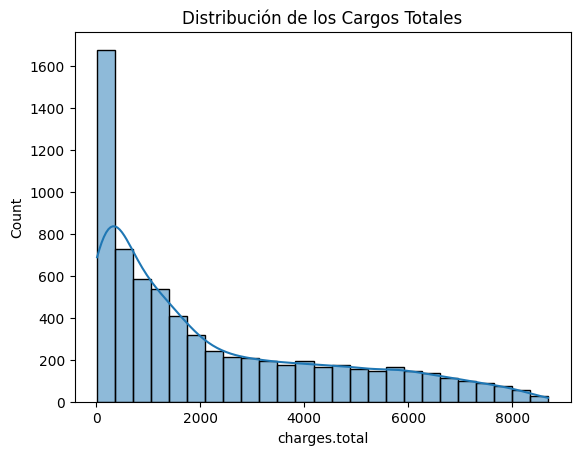

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges.total'], kde=True)
plt.title("Distribución de los Cargos Totales")
plt.show()


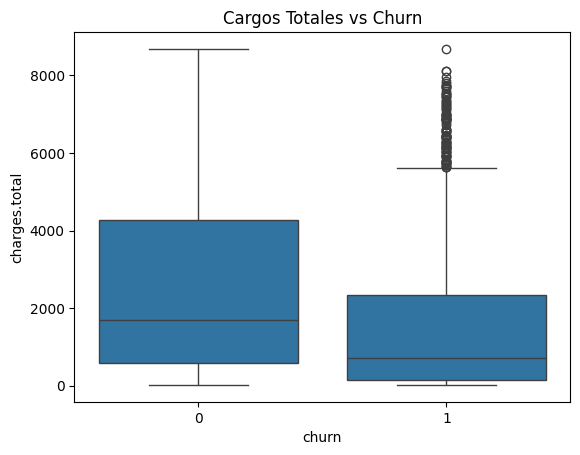

In [456]:
sns.boxplot(data=df, x='churn', y='charges.total')
plt.title("Cargos Totales vs Churn")
plt.show()


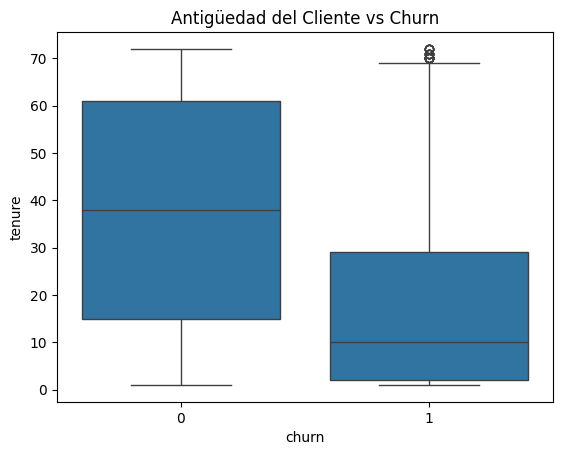

In [457]:
sns.boxplot(data=df, x='churn', y='tenure')
plt.title("Antigüedad del Cliente vs Churn")
plt.show()


**Distribuciones categoricas**

**Variables binarias.**

In [458]:
categoricas = df.select_dtypes(include='object')

for col in categoricas.columns:
    print(f"{col.upper()}")
    print(df[col].value_counts(normalize=True) * 100)  # % por categoría
    print("-" * 40)

CHURN
churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64
----------------------------------------
GENDER
gender
1    50.469283
0    49.530717
Name: proportion, dtype: float64
----------------------------------------
PARTNER
partner
0    51.749147
1    48.250853
Name: proportion, dtype: float64
----------------------------------------
DEPENDENTS
dependents
0    70.150739
1    29.849261
Name: proportion, dtype: float64
----------------------------------------
PHONESERVICE
phoneservice
1    90.32992
0     9.67008
Name: proportion, dtype: float64
----------------------------------------
MULTIPLELINES
multiplelines
no                  48.137088
yes                 42.192833
no phone service     9.670080
Name: proportion, dtype: float64
----------------------------------------
INTERNETSERVICE
internetservice
fiber optic    44.027304
dsl            34.357224
no             21.615472
Name: proportion, dtype: float64
----------------------------------------
ONLINESECURITY
onli

**Distribución de evasión.**

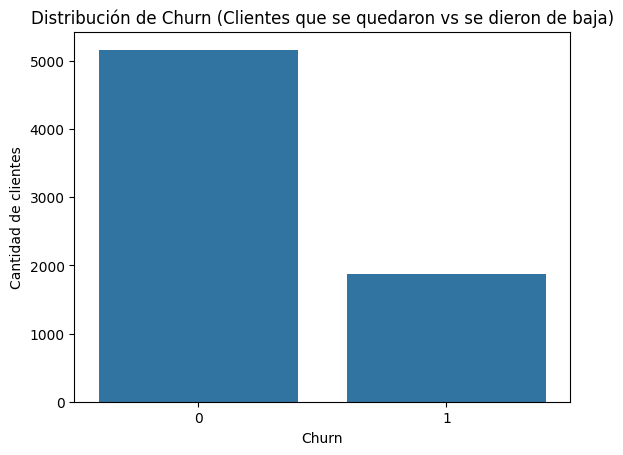

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para la variable 'churn'
sns.countplot(data=df, x='churn')
plt.title('Distribución de Churn (Clientes que se quedaron vs se dieron de baja)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

**Correlación de variables numéricas con Churn.**

In [460]:
print(df['churn'].value_counts(dropna=False))
print(df['churn'].dtype)

churn
0    5163
1    1869
Name: count, dtype: int64
object


In [461]:
df['churn'] = df['churn'].astype(int)

In [462]:
df['churn'].dtype

dtype('int64')

/tmp/ipython-input-1764670307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


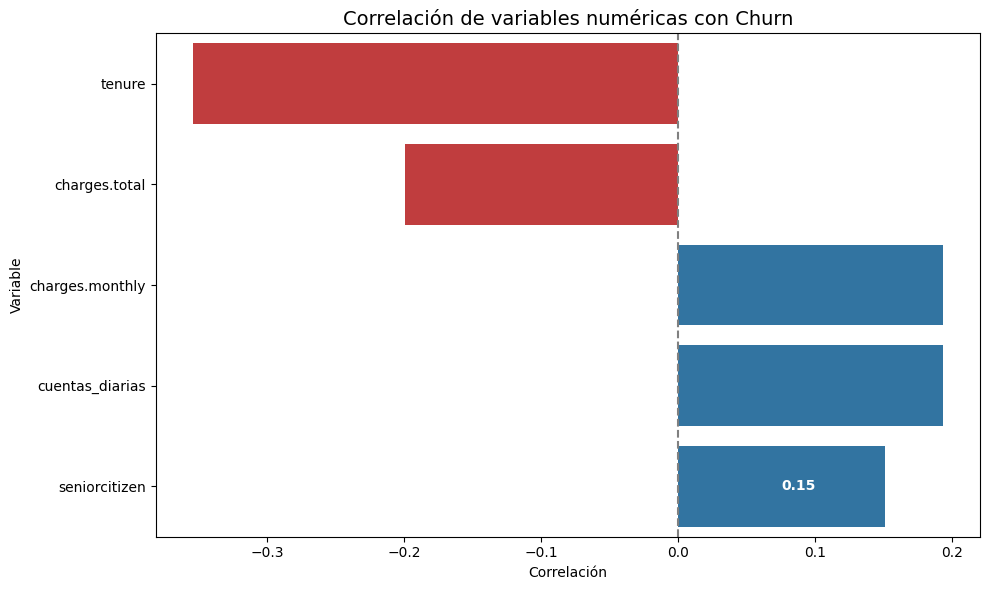

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlaciones
df['churn'] = df['churn'].astype(int)
num_vars = df.select_dtypes(include='number').columns.drop('churn')
correlations = df[num_vars].apply(lambda x: df['churn'].corr(x)).sort_values(key=abs, ascending=False)
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlación']

# Definir colores: azul para positivo, rojo para negativo
colores = ['#1f77b4' if c >= 0 else '#d62728' for c in correlation_df['Correlación']]

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=correlation_df,
    x='Correlación',
    y='Variable',
    palette=colores
)

# Agregar valores numéricos dentro de las barras
for i, (corr, var) in enumerate(zip(correlation_df['Correlación'], correlation_df['Variable'])):
    x_pos = corr - 0.05 if corr > 0 else corr + 0.05
    align = 'right' if corr > 0 else 'left'

plt.text(x_pos, i, f"{corr:.2f}", color='white', va='center', ha=align, fontweight='bold')

# Títulos y línea central
plt.title('Correlación de variables numéricas con Churn', fontsize=14)
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


1. "Tenure" (antigüedad del cliente) tiene la mayor correlación negativa con churn.
Correlación negativa fuerte: a mayor tiempo que el cliente ha permanecido con la empresa, menor es la probabilidad de que se dé de baja.

 Conclusión: La lealtad del cliente es un factor protector contra la cancelación del servicio.

2. "Charges.Total" (gasto total) tiene una correlación negativa significativa con churn.
Clientes que han invertido más dinero en la empresa tienden a permanecer más tiempo.

 Conclusión: Los clientes que han gastado más probablemente estén más satisfechos, o ven más valor en el servicio, y por eso no se van fácilmente.

3. "Charges.Monthly" (cargo mensual) tiene una correlación positiva con churn.
Clientes con cargos mensuales más altos tienen mayor probabilidad de abandonar el servicio.

 Conclusión: Las tarifas elevadas podrían ser una causa directa de cancelación, especialmente si no se percibe valor equivalente.



**Correlación variables categoricas churn.**

In [464]:
import pandas as pd

# Lista de columnas categóricas (excluyendo churn si es categórica)
cat_cols = df.select_dtypes(include='object').columns.drop('churn', errors='ignore')

for col in cat_cols:
    print(f"\n📊 Variable: {col}")
    print(pd.crosstab(df[col], df['churn'], normalize='index') * 100)



📊 Variable: gender
churn           0          1
gender                      
0       73.040482  26.959518
1       73.795435  26.204565

📊 Variable: partner
churn            0          1
partner                      
0        67.023908  32.976092
1        80.282935  19.717065

📊 Variable: dependents
churn               0          1
dependents                      
0           68.720860  31.279140
1           84.468795  15.531205

📊 Variable: phoneservice
churn                 0          1
phoneservice                      
0             75.000000  25.000000
1             73.252519  26.747481

📊 Variable: multiplelines
churn                     0          1
multiplelines                         
no                74.918759  25.081241
no phone service  75.000000  25.000000
yes               71.351534  28.648466

📊 Variable: internetservice
churn                    0          1
internetservice                      
dsl              81.001656  18.998344
fiber optic      58.107235  41.89276

In [465]:
from scipy.stats import chi2_contingency

for col in cat_cols:
    tabla = pd.crosstab(df[col], df['churn'])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{col}: p-value = {p:.4f}")


gender: p-value = 0.4905
partner: p-value = 0.0000
dependents: p-value = 0.0000
phoneservice: p-value = 0.3499
multiplelines: p-value = 0.0036
internetservice: p-value = 0.0000
onlinesecurity: p-value = 0.0000
onlinebackup: p-value = 0.0000
deviceprotection: p-value = 0.0000
techsupport: p-value = 0.0000
streamingtv: p-value = 0.0000
streamingmovies: p-value = 0.0000
contract: p-value = 0.0000
paperlessbilling: p-value = 0.0000
paymentmethod: p-value = 0.0000


1. contract	0.0000: Muy fuerte	El tipo de contrato tiene fuerte influencia: contratos mensuales probablemente tengan más churn.
2. internetservice	0.0000: Muy fuerte	El tipo de internet (DSL, fibra, ninguno) afecta si el cliente se va.
3. techsupport	0.0000: Muy fuerte	No tener soporte técnico se asocia con más churn.
4. onlinesecurity	0.0000: Muy fuerte	Similar a lo anterior, no tener seguridad en línea puede influir.
5. paymentmethod	0.0000: Muy fuerte	El método de pago influye; posiblemente pagos automáticos reduzcan churn.
6. paperlessbilling	0.0000: Fuerte	Facturación electrónica puede relacionarse con más abandono.
7. partner, dependents	0.0000: Fuerte	Clientes con pareja o dependientes tienden a permanecer más.
8. multiplelines	0.0036: Moderada	Tener múltiples líneas puede influir ligeramente.

**1. Mapear aquellas variables que presentan mas de dos opciones.**

In [466]:
# Generar variables dummies (one-hot) para todas las categóricas no binarias
df_dummies = pd.get_dummies(df, columns=['internetservice', 'contract', 'paymentmethod'], drop_first=True)


In [467]:
df_dummies['churn'] = pd.to_numeric(df['churn'], errors='coerce')

# Filtrar columnas numéricas para calcular correlación con churn
num_vars = df.select_dtypes(include='number').columns.drop('churn')
correlations = df[num_vars].apply(lambda x: df['churn'].corr(x)).sort_values(key=abs, ascending=False)

# Visualizar las correlaciones más fuertes
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlación']

# Mostrar
print(correlation_df.head(10))  # las 10 más correlacionadas


          Variable  Correlación
0           tenure    -0.354049
1    charges.total    -0.199484
2  charges.monthly     0.192858
3  cuentas_diarias     0.192858
4    seniorcitizen     0.150541


**2a. Revisar las columnas categóricas relevantes con Churn.**

In [468]:
df_dummies.reset_index(inplace=True)

In [469]:
df_dummies.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling'],
      dtype='object')

In [470]:
df_dummies.dtypes

,0
customerID,object
churn,int64
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
onlinesecurity,object


**2b. Verificar categorías y corregir si hay errores.**

In [471]:
for col in df_dummies.select_dtypes(include='object').columns:    print(f"{col}: {df_dummies[col].unique()}")

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
gender: [0 1]
partner: [1 0]
dependents: [1 0]
phoneservice: [1 0]
multiplelines: ['no' 'yes' 'no phone service']
onlinesecurity: ['no' 'yes' 'no internet service']
onlinebackup: ['yes' 'no' 'no internet service']
deviceprotection: ['no' 'yes' 'no internet service']
techsupport: ['yes' 'no' 'no internet service']
streamingtv: ['yes' 'no' 'no internet service']
streamingmovies: ['no' 'yes' 'no internet service']
paperlessbilling: [1 0]


**3. Codificar variables categóricas Variables con más de 2 categorías
Usa One Hot Encoding:**

In [472]:
print("Columnas antes de get_dummies:")
print(df.columns.tolist())


Columnas antes de get_dummies:
['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges.monthly', 'charges.total', 'cuentas_diarias']


In [473]:
#cat_cols = ['internetservice', 'contract', 'paymentmethod']  # ajusta según tus columnas

#df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [474]:
print("Columnas después de get_dummies:")
print(df.columns.tolist())


Columnas después de get_dummies:
['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges.monthly', 'charges.total', 'cuentas_diarias']


In [475]:
df_dummies.reset_index(inplace=True)

**4. Separar variables predictoras y objetivo.**


In [476]:
print(df_dummies.columns)

Index(['index', 'customerID', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'charges.monthly',
       'charges.total', 'cuentas_diarias', 'internetservice_fiber optic',
       'internetservice_no', 'contract_one year', 'contract_two year',
       'paymentmethod_credit card (automatic)',
       'paymentmethod_electronic check', 'paymentmethod_mailed check'],
      dtype='object')


In [477]:
X = df_dummies.drop(columns=['churn', 'customerID'])  # o cualquier otro ID
y = df_dummies['churn']

In [478]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [479]:
X = df_dummies.drop(columns='churn')  # o ['churn', 'customerID'] si corresponde
y = df_dummies['churn']


In [480]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [481]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1400  154]
 [ 300  256]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1554
           1       0.62      0.46      0.53       556

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



 Clase 0: Clientes que no se dieron de baja
Precision = 0.82 → De cada 100 clientes que el modelo dijo que no se iban, 82 realmente no se fueron.

Recall = 0.90 → De cada 100 clientes que realmente no se fueron, el modelo detectó correctamente a 90.

F1-score = 0.86 → Buen equilibrio entre precisión y cobertura. Muy buen rendimiento.

Clase 1: Clientes que sí se dieron de baja (churn)
Precision = 0.62 → Solo el 62% de los que predijo como churn realmente se fueron.

Recall = 0.46 → El modelo sólo detectó el 46% de los verdaderos casos de churn.

F1-score = 0.53 → Rendimiento moderado. Mucho espacio para mejorar.

**4. Separar datos en train y test.**

In [482]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Caracteristicas en orden de mayor correlacion con Churn.:**

In [483]:
df.select_dtypes(include='object').columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

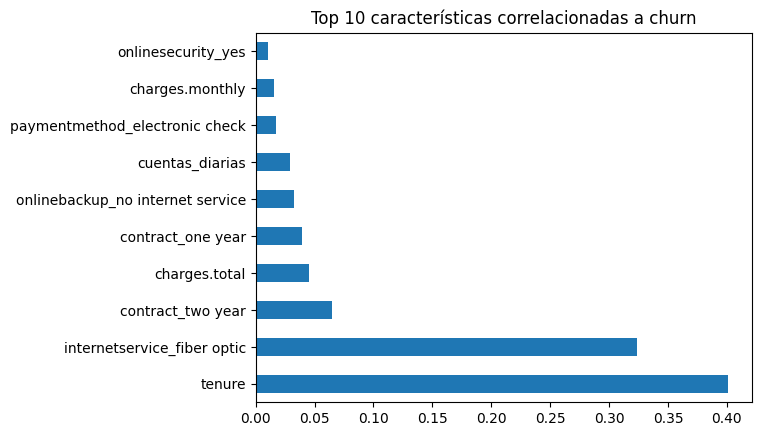

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 características correlacionadas a churn")
plt.show()


**Matriz de correlación.**

In [485]:
df_numericas = df.select_dtypes(include='number')

In [486]:
matriz_corr = df_numericas.corr()

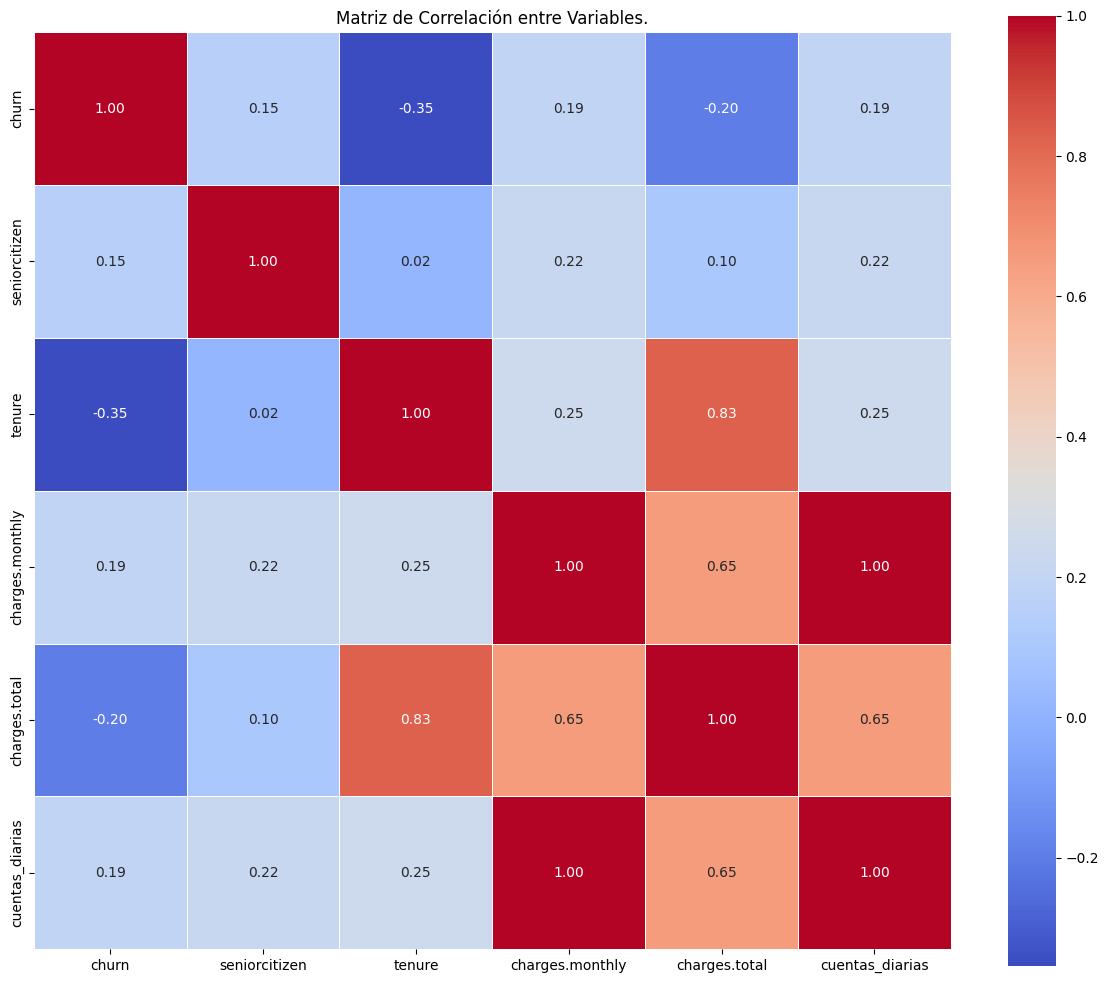

In [487]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Matriz de Correlación entre Variables.")
plt.tight_layout()
plt.show()


**Extra:**

**!. Correlación entre cuentas_diarias y Churn.**

In [488]:
correlacion = df['cuentas_diarias'].corr(df['churn'])
print(f"Correlación entre cuentas_diarias y churn: {correlacion:.4f}")


Correlación entre cuentas_diarias y churn: 0.1929


/tmp/ipython-input-792565941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='coolwarm')


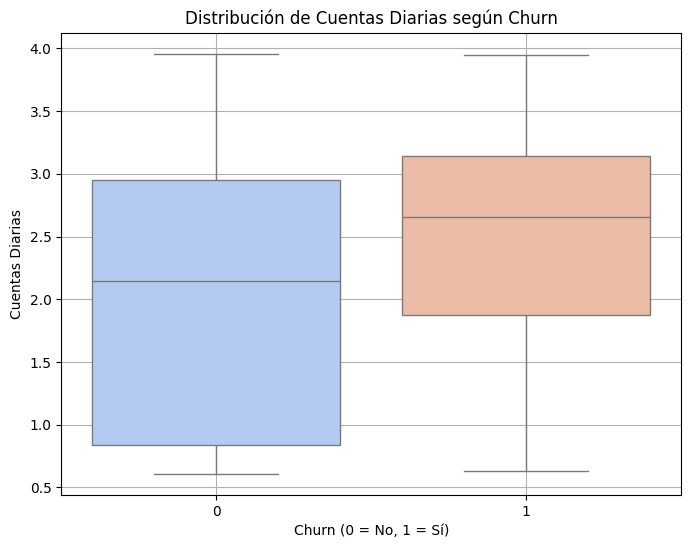

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='coolwarm')
plt.title("Distribución de Cuentas Diarias según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cuentas Diarias")
plt.grid(True)
plt.show()




 Mediana más alta en churn = 1:indica que los clientes que se dieron de baja tienden a tener cuentas diarias más altas.
Puede sugerir que el costo diario influye en la cancelación del servicio.

**2. Correlación entre multiples servicios y churn.**

In [490]:
df.columns.tolist()

['churn',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'charges.monthly',
 'charges.total',
 'cuentas_diarias']

/tmp/ipython-input-3385447156.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='-log10(p-value)', y=chi2_df.index, data=chi2_df, palette='coolwarm')


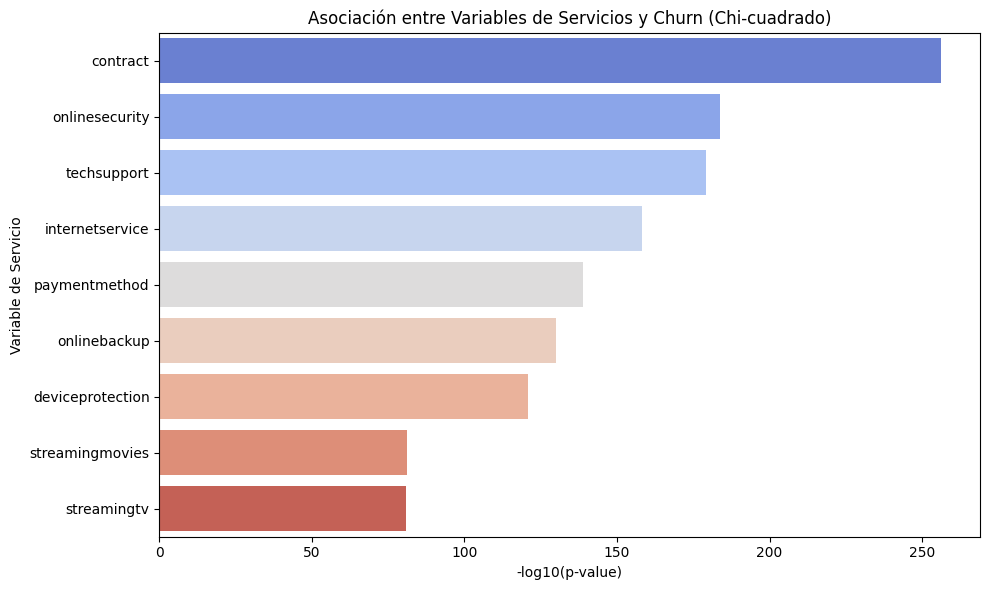

In [491]:
from scipy.stats import chi2_contingency
import numpy as np

# Variables con múltiples categorías a analizar
multi_cat_vars = ['internetservice', 'contract',  'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','contract', 'paymentmethod', 'streamingtv', 'streamingmovies']

# Diccionario para almacenar los resultados
chi2_results = {}

for var in multi_cat_vars:
    contingency_table = pd.crosstab(df[var], df['churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[var] = -np.log10(p)  # usamos -log10(p) como medida de importancia

# Convertimos a DataFrame y ordenamos
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['-log10(p-value)'])
chi2_df = chi2_df.sort_values(by='-log10(p-value)', ascending=False)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='-log10(p-value)', y=chi2_df.index, data=chi2_df, palette='coolwarm')
plt.title("Asociación entre Variables de Servicios y Churn (Chi-cuadrado)")
plt.xlabel("-log10(p-value)")
plt.ylabel("Variable de Servicio")
plt.tight_layout()
plt.show()


Variables con barras más largas:

Tienen mayor asociación estadística con churn: contract, onlinesecurity, techsupport.

In [492]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [493]:
df_flat.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


#📄Informe final

El objetivo del analisis es identificar las razones detrás de la alta tasa de churn en Telecom X mediante el análisis de datos y determinar cuales son posibles patrones de comportamiento entre quienes han abandonado a la empresa.
Telecom X, una empresa de telecomunicaciones, está experimentando una alta tasa de evasión de clientes (churn).

**Limpieza y Tratamiento de Datos:**
1. Importación de los datos
Se importó un archivo .json desde un repositorio de GitHub o Google Colab.
Se usó pandas.read_json() o pd.read_csv() (según el formato transformado) para cargarlo en un DataFrame (df).
2. Estandarización de nombres de columnas
Se renombraron las columnas para facilitar su manipulación.
3. Detección y tratamiento de valores nulos
Se usaron funciones como df.isnull().sum() y df.info() para identificar columnas con valores nulos
  -En charges.total, los nulos se imputaron o eliminaron tras convertir a numérico.
  -En churn, los nulos se eliminaron directamente por ser la variable objetivo.
4. Se convirtieron columnas numéricas mal tipadas como charges.total y charges.monthly. También se transformó la variable churn a formato binario.
5. Se creó la columna cuentas_diarias dividiendo el cargo mensual por 30.
6. Las variables categóricas con más de 2 opciones fueron transformadas con One-Hot Encoding. Las variables binarias fueron mapeadas con 1 y 0.
7. Eliminación de columnas irrelevantes: se eliminó customerID, ya que no aporta información útil para modelos predictivos.
8. Normalización / Estandarización de variables numéricas: para algunas variables como charges.total, se aplicaron técnicas como Min-Max Scaling o estandarización (opcional según el modelo).
9. Verificación final: se revisaron nuevamente los tipos de datos y la ausencia de nulos.
**Análisis Exploratorio de Datos (EDA):**
1. Distribución de la Variable Objetivo: Churn
Gráfico: Barplot mostrando la cantidad de clientes que se han ido (churn = 1) y los que se han quedado (churn = 0).
Observación: la proporción de clientes que abandonan es menor que la de los que permanecen.Esto confirma un problema de desbalance de clases.
2. Distribución de Cargos Totales (charges.total):
Observación:
Distribución asimétrica a la derecha (sesgo positivo).
Algunos valores atípicos (outliers) en clientes con cargos muy altos.
Coeficiente de variación cercano al 100%, lo que indica alta dispersión.
3. Relación entre charges.total y churn
Observación: los clientes que abandonan tienen una mediana de cargos total ligeramente menor. Es posible que muchos se den de baja en etapas tempranas del ciclo de vida.
4. Relación entre tenure (tiempo como cliente) y churn: Observación: clientes con menor tenure tienden más al churn. Patrón claro: a mayor antigüedad, menor probabilidad de darse de baja.
5. Cuentas Diarias (cuentas_diarias) vs Churn: Correlación: ~0.19 con churn.
Interpretación: clientes que pagan más por día tienden a permanecer más. Posible relación con clientes premium o con más servicios.
6. Correlación de Variables Numéricas con churn:
Observación: tenure, charges.total, cuentas_diarias muestran correlación moderada con churn.
Utilizado para seleccionar variables predictoras.
7. Chi-Cuadrado para Variables Categóricas
Gráfico: -log10(p-value) de las pruebas de asociación entre variables categóricas y churn. Observación: variables como contract, techsupport, paymentmethod, etc., tienen alta asociación. Variables como gender y phoneservice no son significativas.
8. Matriz de Correlación Numérica: heatmap de correlación entre variables numéricas. Observación: útil para detectar colinealidad entre variables (por ejemplo, entre cargos y cuentas diarias). Ninguna correlación extremadamente alta que requiera eliminación.
**Conclusiones Generales del EDA:**
1. Los clientes con menos antigüedad y cargos más bajos tienen mayor tasa de churn.
2. La variable contract es una de las más influyentes categóricas según el análisis Chi-cuadrado.
3. Los patrones de consumo diario (cuentas_diarias) y soporte técnico (techsupport) ayudan a identificar propensión al churn.
**Conclusiones e Insights del Análisis de Churn:**
1. Variables con mayor influencia en el churn
Utilizando métodos de correlación y prueba Chi-cuadrado, se identifican que algunos servicios y características contractuales están fuertemente asociados con la evasión de clientes:
 - contract: los contratos mensuales tienen una mayor tasa de churn en comparación con contratos anuales o bianuales.
 - paperlessbilling: los clientes que usan facturación sin papel presentan mayor propensión a darse de baja.
 - paymentmethod:	métodos como Electronic Check se asocian a mayor churn que otros como tarjetas o transferencias automáticas.
 - techsupport, onlinesecurity, onlinebackup:	los clientes que no cuentan con servicios adicionales de soporte o seguridad tienen mayor probabilidad de abandono.
 - internetservice:	el tipo de servicio (por ejemplo, fibra óptica vs DSL) muestra correlaciones con la tasa de churn.
 2. Clientes con múltiples servicios están más comprometidos. Los clientes que usan más de un servicio (como onlinesecurity, streamingtv, techsupport) muestran menor propensión al churn. Esto sugiere que aumentar la dependencia del cliente a través de paquetes de servicios podría reducir la evasión.
 3. Factores financieros y comportamiento. El análisis de la variable charges_total mostró: alta dispersión en los cargos. Clientes con cargos más bajos tienden a abandonar más rápido, lo que puede implicar menor uso o fidelización. La variable derivada cuentas_diarias mostró una correlación positiva débil con el churn, pero sugiere que un uso constante diario podría ser un indicador de retención.
 4. Segmentación y targeting de retención: con estos hallazgos, se pueden tomar acciones estratégicas:
 - Diseñar paquetes de servicios combinados. Disminuye el churn al aumentar la dependencia del cliente.
 - Incentivar contratos anuales: los contratos largos reducen la tasa de churn.
 - Revisión de métodos de pago más propensos al abandono, promover métodos automáticos o seguros.
 - Ofrecer promociones de onboarding con soporte técnico o respaldo en línea. Estas variables muestran fuerte relación con la retención.

**Recomendaciones Estratégicas para Reducir el Churn en TelecomX:**
1. Reformar las opciones de contrato:
 - Problema detectado: Los clientes con contratos mensuales tienen una tasa de evasión significativamente mayor que aquellos con contratos anuales o bianuales.
  - Recomendación: incentivar la migración hacia contratos de mayor duración mediante descuentos, beneficios exclusivos o meses gratis. Introducir programas de fidelización escalonada, donde a mayor permanencia, mayores beneficios.
2. Promover servicios complementarios:
 - Problema detectado: La falta de servicios como techsupport, onlinesecurity, onlinebackup está correlacionada con mayor churn.
  - Recomendación: ofrecer paquetes combinados (bundles) que incluyan estos servicios con precios promocionales. Realizar campañas educativas sobre el valor de estos servicios, especialmente para clientes nuevos o de bajo compromiso.
3. Optimizar el método de pago:
 - Problema detectado: El método de pago electronic check tiene una fuerte asociación con mayor tasa de churn.
 - Recomendación: fomentar el uso de métodos de pago automáticos como tarjeta o débito automático, mediante bonificaciones o premios. Detectar clientes con métodos de pago de alto riesgo y aplicar estrategias de retención preventiva (como llamadas, ofertas, encuestas).

4. Reducir el riesgo del Paperless Billing:
 - Problema detectado: La facturación sin papel (paperlessbilling) también se relaciona con mayor churn.
 - Recomendación: revisar el diseño, claridad y periodicidad de las facturas electrónicas. Asegurarse de que lleguen de forma efectiva y con opciones visibles para soporte. Considerar volver al papel como opción gratuita para clientes con bajo engagement digital.
5. Segmentar clientes para retención inteligente
 - Estrategia clave: aplicar modelos predictivos (como árboles de decisión) para identificar clientes de alto riesgo de churn. Diseñar acciones de retención personalizadas por segmento:

a.  Clientes leales: recompensas.

b. Clientes indecisos: promociones.

c. Clientes de alto riesgo: intervención directa del equipo de retención.

6. Mejorar la experiencia de incorporación (onboarding):
 - Oportunidad: Clientes con múltiples servicios tienden a quedarse más tiempo.
 - Recomendación: crear un proceso de onboarding que incentive la contratación de más de un servicio desde el inicio. Enviar emails o llamadas de bienvenida con ofertas exclusivas por contratación múltiple.


